In [45]:
from keras.layers import Input, Dense,Flatten, LeakyReLU as LR,Dropout,Activation,Reshape,Conv2D,UpSampling2D,MaxPooling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential

In [46]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [47]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [48]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [55]:
#30 is best so far
#20 is good, but they all look like the same number 
#10 is also good 
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0940 - val_loss: 0.0925
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0938 - val_loss: 0.0924
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0937 - val_loss: 0.0922
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0935 - val_loss: 0.0922
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0934 - val_loss: 0.0921
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0934 - val_loss: 0.0920
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0933 - val_loss: 0.0920
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0932 - val_loss: 0.0919
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0931 - val_loss: 0.091

In [56]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

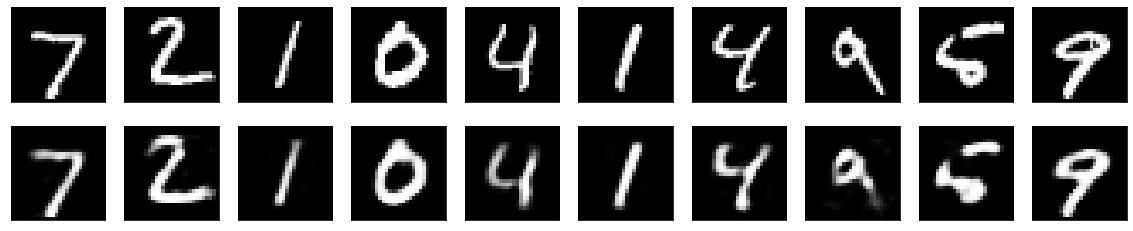

In [57]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
